# Advanced Plotting with Pandas

For basic plotting see the notebooks:
    
* [Matplotlib](https://gitlab.erc.monash.edu.au/ads1001/python-data-science-resources/-/blob/master/03-BeginnerToAdvanced/04-PlottingMPL_Intro.ipynb)
* [Pandas](https://gitlab.erc.monash.edu.au/ads1001/python-data-science-resources/-/blob/master/03-BeginnerToAdvanced/05-PandasWeather.ipynb)
* [Seaborn](https://gitlab.erc.monash.edu.au/ads1001/python-data-science-resources/-/blob/master/03-BeginnerToAdvanced/06_Seaborn.ipynb)

For further advanced plotting with Pandas see [Pandas Doc](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools). For Matplotlib, see the [Examples](https://matplotlib.org/stable/gallery/index.html), [Tutorials](https://matplotlib.org/stable/tutorials/index.html) and [Cheat Sheets](https://matplotlib.org/cheatsheets/). For Seaborn, see the [Documentation](https://seaborn.pydata.org/).

Other popular plotting packages for Python are:
* [Plotly](https://plot.ly/python/)
* [ggplot](http://ggplot.yhathq.com/)
* [Altair](https://altair-viz.github.io/)
* [Folium](https://python-visualization.github.io/folium/)
* [Bokeh](https://bokeh.org/)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

## Contents

* Timeseries
* Subplots
* Groupby
* Three-dimensional plots
* Saving files
* Exercises

## Timeseries

Here we will show some examples of plotting techniques using the MicroSoft share prices downloaded from [Yahoo Finance](https://finance.yahoo.com/quote/MSFT/).

In [2]:
msft = pd.read_csv('MSFT.csv')
msft.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

The `Date` field is a string, so to work with the field we need to convert it to a datetime field. First we need to know the format, which we can view the header.

In [3]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-25,304.299988,304.589996,300.420013,302.010010,299.501678,20006100
1,2021-08-26,300.989990,302.429993,298.950012,299.089996,296.605896,17666100
2,2021-08-27,298.989990,300.869995,296.829987,299.720001,297.230682,22605700
3,2021-08-30,301.119995,304.220001,301.059998,303.589996,301.068512,16348100
4,2021-08-31,304.420013,304.500000,301.500000,301.880005,299.372772,26285300


Now the field can be converted to a datetime field, and set as the index.

In [4]:
msft['Date'] = pd.to_datetime(msft['Date'], format='%Y-%m-%d')
msft.set_index('Date', inplace=True)
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-25,304.299988,304.589996,300.420013,302.010010,299.501678,20006100
2021-08-26,300.989990,302.429993,298.950012,299.089996,296.605896,17666100
2021-08-27,298.989990,300.869995,296.829987,299.720001,297.230682,22605700
2021-08-30,301.119995,304.220001,301.059998,303.589996,301.068512,16348100
2021-08-31,304.420013,304.500000,301.500000,301.880005,299.372772,26285300


To plot a single field as a function of time, we can use the builtin `df.plot()` routine. By default this creates a line plot. Since the `pandas` plotting routines are just wrappers around `matplotlib` routines, we can then annonate the figure using `matplotlib` functions. In this case we use `plt.fill_between()` to show the range of the share price for each day.

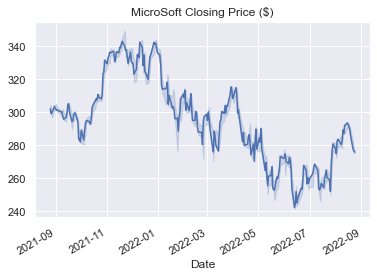

In [5]:
msft['Close'].plot()
plt.fill_between(msft.index, msft.Low, msft.High, color="b", alpha=0.2);
plt.title('MicroSoft Closing Price ($)');

Another common task that we might want to do with timeseries is plot two fields with different scales, which requires different axes on the left and right. This can be done with `ax.twinx()`, however with `df.plot()` we just need to specify the keyword `secondary_y` and the name of the field with the axis on the right. We also set `mark_right=False`, so this information is not included on the legend.

<Figure size 432x288 with 0 Axes>

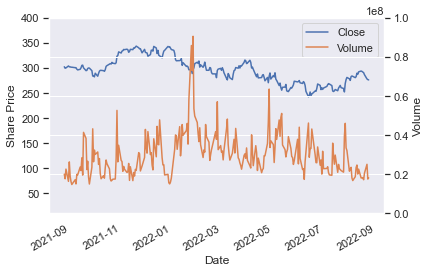

In [6]:
plt.figure();
ax = msft[['Close', 'Volume']].plot(secondary_y=["Volume"], mark_right=False)
ax.set_ylabel("Share Price");
ax.set_ylim((10,400))
ax.right_ax.set_ylim((.0,1.e8))
ax.right_ax.set_ylabel("Volume");

To change the format of the dates, we can use `DateFormatter` and set the major format of the x-axis. The field `%b` indicates to print the month as a three-letter abbreviation, and `%Y` prints the year in four-digit format.

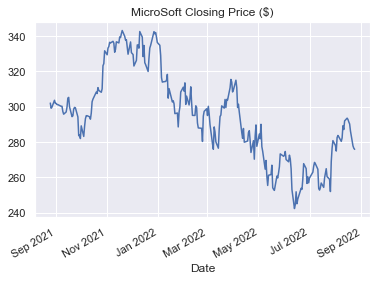

In [7]:
from matplotlib.dates import DateFormatter, MonthLocator
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure();
ax = msft['Close'].plot()
date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)
plt.title('MicroSoft Closing Price ($)');

To change the number of ticks on the x-axis we can use `MonthLocator`, where here we set the interval to be four months. Then using `fig.autofmt_xdate()` we can control the rotation and horizontal alignment (ha) of the string.

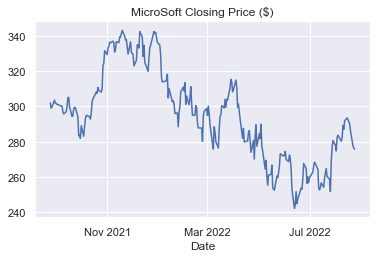

In [8]:
fig = plt.figure();
ax = msft['Close'].plot()
ax.xaxis.set_major_locator(MonthLocator(interval=4))
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
fig.autofmt_xdate(rotation=0, ha='center')
plt.title('MicroSoft Closing Price ($)');

## Subplots

If the dataframe has multiple fields, these can be plotted as subplots by specifying `subplots=True`. 

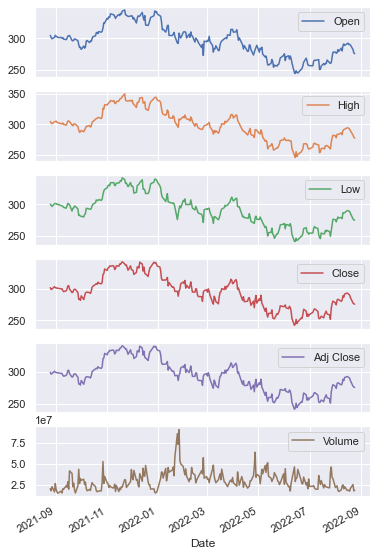

In [9]:
msft.plot(subplots=True, figsize=(6,10));

The `layout` keyword then specifies the number of rows and columns for the subplots, with the rows being the first number of the tuple and the columns being the second number. If the plots share the same x-axis only the axis at the bottom of the subplots will be plotted for `sharex=True`. If the scale on the y-axis is the same, we could also specify `sharey=True`, however that is not appropriate in this case.

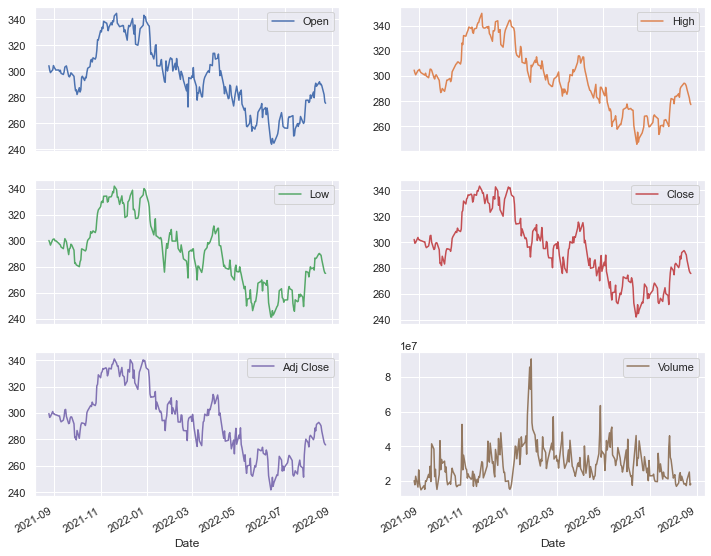

In [10]:
msft.plot(subplots=True, layout=(3,2), figsize=(12,10), sharex=True);

## Groupby

One of the functions for plotting statistical data is `df.boxplot()`. If the features also include categorical data, this can be used to plot by the various categories. This process is similar to using the `df.groupby()` method which is detailed in [Groupby Notebook](https://gitlab.erc.monash.edu.au/ads1001/python-data-science-resources/-/blob/master/03-BeginnerToAdvanced/07-AggregationGrouping.ipynb).

An example of a dataset with categorical and continuous features is the `seaborn` penguins dataset.

In [11]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


To create box and whisker plots which are categorized by species we can specify this with a list of columns passed to the `by` keyword. Multiple categories could be passed in this list, though the figures then become quite crowded. This provides a clearer categorization than first using `df.groupby()` and then plotting.

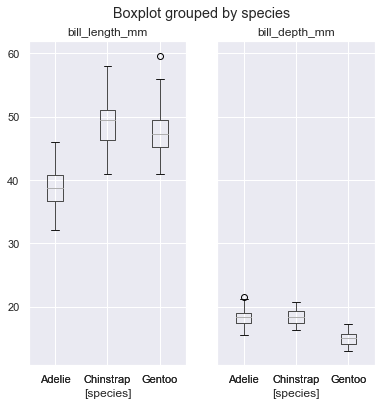

In [12]:
penguins.boxplot(column=['bill_length_mm', 'bill_depth_mm'], by=['species'], figsize=(6, 6));

Using the pandas plotting function `scatter_matrix()`, some of the functionality of `seaborn.pairplot()` can be replicated. In this case we can show the correlation between the penguins continuous features, and the distribution of the features is shown on the main axis as a continuous distribution or histogram.

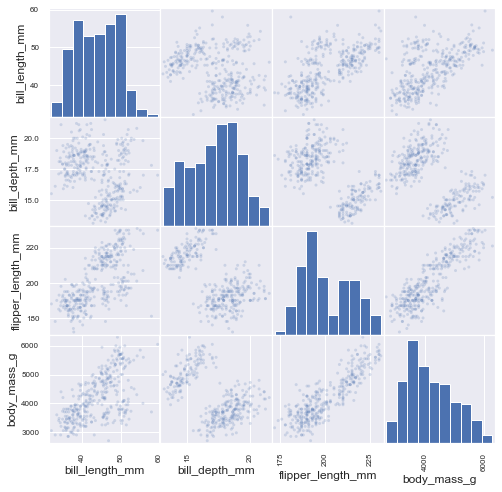

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(penguins, alpha=0.2, figsize=(8, 8), diagonal="hist");

Histograms of the continuous features can be created using `df.hist()` and `df.plot.hist()` (which is equivalent to `df.plot(kind='hist')`. Using `df.hist()` the histograms for each feature are plotted on separate axes.

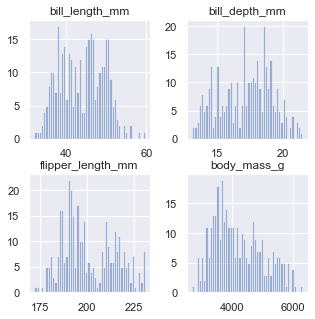

In [14]:
penguins.hist(alpha=0.5, bins=50, figsize=(5, 5));

While using `df.hist.plot()` the histograms for each feature are plotted on the same axes. In this case care needs to be taken to only plot features which have the same scale.

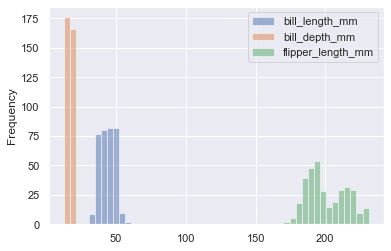

In [15]:
penguins[['bill_length_mm', 
          'bill_depth_mm', 
          'flipper_length_mm']].plot.hist(alpha=0.5, bins=50);

## Two-dimensional plots

We now focus on plotting of two-dimensional functions using contour plots and the `mplot3d` funciton, which is used for setting up three-dimensional axes. Then routines such as `plt.plot()` and `plt.scatter()` can be overloaded to create three-dimensional plots.

Using colormaps is particular useful for contour plots and three-dimensional surfaces. For a list of colormaps see [Matplotlib documentation](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

We have shown how to create three-dimensional scatter plots in previous notebooks, so here we will first demonstrate how to create a three-dimensional parametric plot. First import `mplot3d`.

In [16]:
# import function to enable 3-dimensional plotting in matplotlib
from mpl_toolkits import mplot3d 

Three-dimensional plots are typically parametric plots where, for example $y=y(x)$ and $z=z(x)$, or $x=x(s)$, $y=y(s)$ and $z=z(s)$, where $s$ is known as a parameter and increases as we traverse the curve.

To create an conical curve we can make our parameter the polar coordinate angle $\theta$ , then $z$ is proportional to $\theta$ and $x = z\cos(\theta)$ and $y=z\sin(\theta)$. Once the three-dimensional axes are set up the functions $x$ , $y$ and $z$ can be passed to `ax.plot()`. The last thing to be done is to change the viewing angle. The elevation angle (`elev`) changes the viewing angle from the horizontal, while the azimuthal angle (`azim`) is the rotation of the figure about the z-axis.

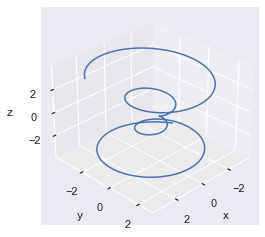

In [17]:
theta = np.linspace(-12,12,1000)

z = theta/np.pi
x = z*np.cos(theta)
y = z*np.sin(theta)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(elev=30, azim=45)

To create three-dimensional plots the functions `np.linspace()` and `np.meshgrid()` are particularly useful. 

`np.linspace()` creates a vector which goes from the lower limit (first argument) to the upper limit (second argument) in 50 equally spaced intervals. The number of intervals can be changed by specifying a third integer argument.

`np.meshgrid()` takes two vectors and creates two matrices of size equal to the product of the vectors, where the X matrix has the x values repeated in each column and the Y matrix has the y values repeated in each row.

In [18]:
x = np.linspace(-5,5)
y = np.linspace(-5,5)
X, Y = np.meshgrid(x,y)
X.shape

(50, 50)

Now to create a function of x and y, we can use the matrix outputs of `np.meshgrid()`. In the following cell

$$ z(x,y) = \frac{x}{x^2+1} \exp \left( -\left( \frac{Y}{2} \right)^2 \right). $$

In [19]:
Z = X/(X**2+1)*np.exp(-(Y/2)**2)

To create a surface plot, we first create a figure object and three-dimensional axes for this figure. Then we can use `ax.plot_surface()` to create the three-dimensional surface and add a colourbar to the surface. In this case, since we are using colours the lines that are drawn on the surface are suppressed by setting `linewidth=0`. The x and y arguments for the surface plot must be two-dimensional matrices as output by `np.meshgrid()`.

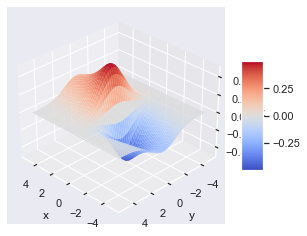

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", linewidth=0);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=30, azim=135)

A wireframe plot can be created using a similar procedure and the function `ax.plot_wireframe()`. The arguments `cstride=5` and `rstride=5` cause only every fifth line in the x (rows) and y (columns) to be plotted. To suppress lines in either direction set `cstride=0` or `rstride=0`. As for the surface plots the x and y arguments must be matrices.

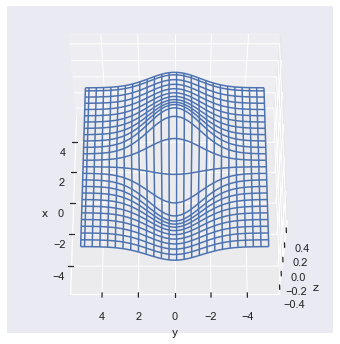

In [21]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(X, Y, Z, cstride=2, rstride=2);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.view_init(elev=60, azim=-180)

Three-dimensional plots can also be represented using contour plots. `plt.contourf` will create filled contour plots, for which it useful to include a colour bar. In this example we illustrate one way of specifying the levels which are plotted, by an array of numerical values. 

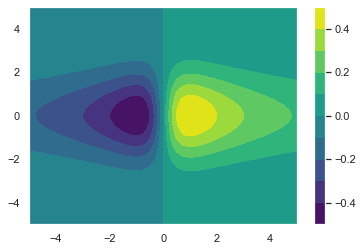

In [22]:
plt.contourf(x, y, Z, cmap="viridis", 
             levels=[-.5,-.4,-.3,-.2,-.1,.0,.1,.2,.3,.4,.5])
plt.colorbar();

`plt.contour()` will plot the contour lines, which could be combined with `plt.contourf()`. In this example we illustrate one way of specifying the levels which are plotted, by the number of levels. 

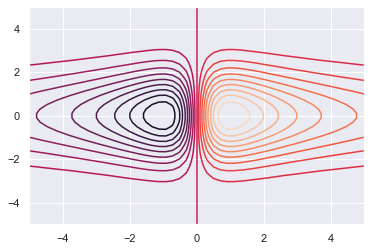

In [23]:
plt.contour(x, y, Z, levels=20) # plot the decision boundaries as filled contours

We can combine surface plots and contour plots by adding a contour plot with an offset, as is done below.

[(-6.0, 6.0),
 (-6.0, 6.0),
 (-1.0, 0.5),
 Text(0.5, 0, 'x'),
 Text(0.5, 0, 'y'),
 Text(0.5, 0, 'z')]

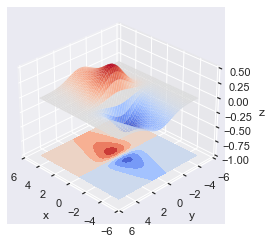

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", linewidth=0);
ax.contourf(X, Y, Z, zdir='z', offset=-1, cmap="coolwarm")
ax.view_init(elev=30, azim=135)
ax.set(xlim=(-6,6), ylim=(-6,6), zlim=(-1, .5),
       xlabel='x', ylabel='y', zlabel='z')


Contours can also be plotted using the image package. 

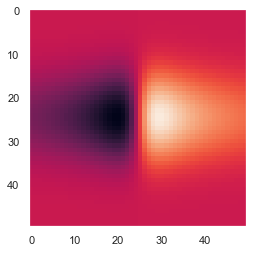

In [25]:
plt.imshow(Z)
plt.grid(False)

## Saving Figures

To save figures we use the routine `plt.savefig()` for which the main argument is the file to be saved to. For high quality figures it is best to save figures as PDF or Scalable Vector Graphics figures, which have the suffixes 'pdf' and 'svg'. These are vector graphics files for which the resolution is maintained as the size of the image is changed. Compare this with images saved with the suffix 'png'. SVG files are designed for webpages, and can be opened in any web browser.

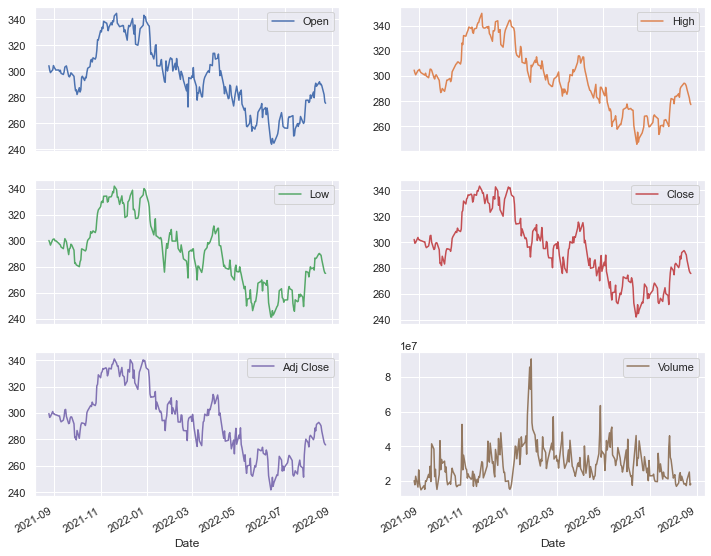

In [26]:
msft.plot(subplots=True, layout=(3,2), figsize=(12,10), sharex=True)
plt.savefig('msft.pdf')

## Exercises 

### Exercise 1 

Use the seaborn titanic dataset and using a boxplot, plot the age distribution of passengers categorized by `pclass` and `embarked`. (2 marks)

In [4]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<AxesSubplot:xlabel='pclass', ylabel='age'>

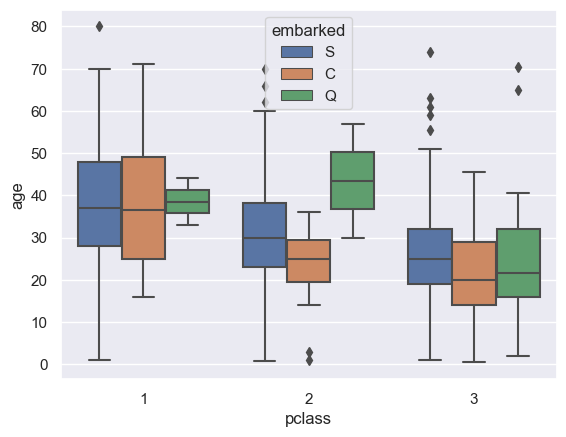

In [5]:
titanic = sns.load_dataset('titanic')
sns.boxplot(x='pclass', y='age', hue='embarked', data=titanic)

### Exercise 2

The file 'Total_doses.csv' details doses of Covid-19 vaccines admininstered in Australia since 21 February 2021, and is downloaded from [Covid-19 in Australia](https://www.covid19data.com.au/vaccines). Plot the total number of the first and second doses against time. You will need to change the date to a datestamp format. (2 marks)

In [14]:
doses = pd.read_csv('Total_doses.csv')
doses.head()

,Date,First doses,Second doses,70% adults,80% adults
0,21/02/2021,20,0,"14,433,971","16,495,967"
1,22/02/2021,1836,0,"14,433,971","16,495,967"
2,23/02/2021,2787,0,"14,433,971","16,495,967"
3,24/02/2021,6926,0,"14,433,971","16,495,967"
4,25/02/2021,16622,0,"14,433,971","16,495,967"


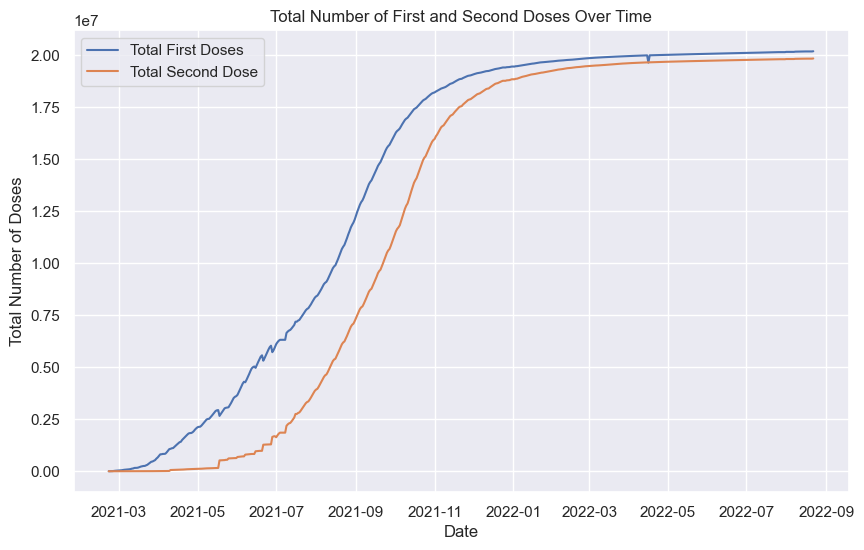

In [21]:
doses['Date'] = pd.to_datetime(doses['Date'], infer_datetime_format=True)
plt.figure(figsize=(10, 6))
plt.plot(doses['Date'], doses['First doses'], label='Total First Doses')
plt.plot(doses['Date'], doses['Second doses'], label='Total Second Dose')
plt.xlabel('Date')
plt.ylabel('Total Number of Doses')
plt.title('Total Number of First and Second Doses Over Time')
plt.legend()
plt.show()

### Exercise 3

Create a surface plot of the function

$$ z(x,y) = \sin(x-2y) $$

over the domain $-2 \le x \le 2$ and $-4 \le y \le 4$. (3 marks)

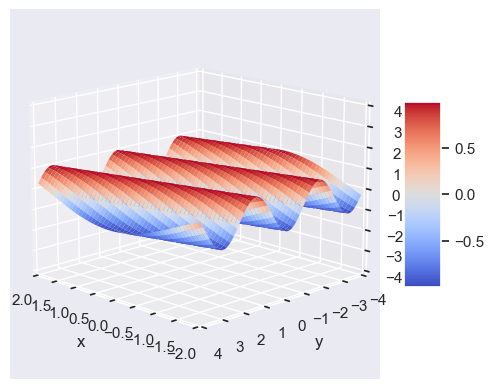

In [36]:
Z = np.sin(X - 2 * Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap="coolwarm", linewidth=0);
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_xlim(-2, 2) # Setting the ranges for x,y,z
ax.set_ylim(-4, 4) 
ax.set_zlim(-4, 4) 
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(elev=15, azim=135)


### Exercise 4

Create a contour plot with filled contours and contour lines for the function

$$ z = x^2+2y^2, $$

over the domain $-2 \le x \le 2$ and $-4 \le y \le 4$. (3 marks)

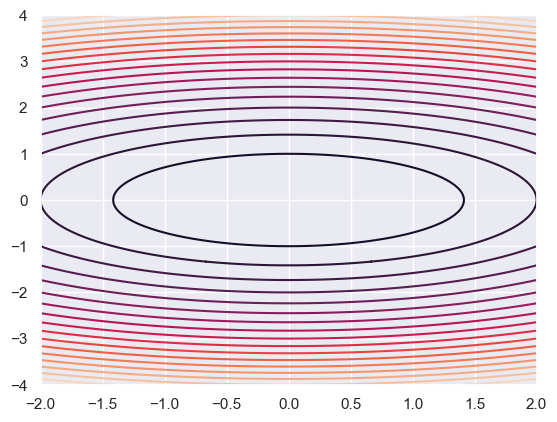

In [37]:
Z = X**2 + 2 * Y**2
plt.contour(x, y, Z, levels=20)
